 **Install & Setup Kaggle API**


In [1]:
# Upload your kaggle.json file first (API key from Kaggle account)
from google.colab import files
files.upload()  # Upload kaggle.json here

# Move and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


**Download Pascal VOC 2012 Dataset**



In [2]:
# Install kaggle CLI if not already installed
!pip install -q kaggle

# Download the dataset
!kaggle datasets download -d gopalbhattrai/pascal-voc-2012-dataset


Dataset URL: https://www.kaggle.com/datasets/gopalbhattrai/pascal-voc-2012-dataset
License(s): unknown
100% 3.52G/3.52G [00:35<00:00, 113MB/s] 
100% 3.52G/3.52G [00:35<00:00, 106MB/s]


**Unzip the Dataset**


In [3]:
# Unzip the downloaded file
import zipfile

with zipfile.ZipFile("pascal-voc-2012-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("voc_dataset")


**Importing datset from kaggle**

In [5]:
!pip install kagglehub --quiet

import kagglehub
import os
import shutil


**Downloading Dataset**


In [6]:
# Download the dataset
dataset_path = kagglehub.dataset_download("gopalbhattrai/pascal-voc-2012-dataset")
print("📁 Dataset downloaded to:", dataset_path)

# Explore folder names to find image location
for root, dirs, files in os.walk(dataset_path):
    print("🔎", root)


100%|██████████| 3.52G/3.52G [01:29<00:00, 42.2MB/s]

Extracting files...


📁 Dataset downloaded to: /root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1
🔎 /root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1
🔎 /root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_test
🔎 /root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_test/VOC2012_test
🔎 /root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_test/VOC2012_test/Annotations
🔎 /root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_test/VOC2012_test/ImageSets
🔎 /root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_test/VOC2012_test/ImageSets/Segmentation
🔎 /root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_test/VOC2012_test/ImageSets/Main
🔎 /root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_test/VOC2012_test/I

**Splitting DataSet**


In [7]:
import os
import shutil

# Define image directory
image_dir = "/root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_train_val/VOC2012_train_val/JPEGImages"

# Output folders for Udhaya and Siddharth
output_dir = "/content/voc_split"
udhaya_dir = os.path.join(output_dir, "udhaya")
siddharth_dir = os.path.join(output_dir, "siddharth")

os.makedirs(udhaya_dir, exist_ok=True)
os.makedirs(siddharth_dir, exist_ok=True)

# Collect first 1000 images
all_images = sorted([f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])[:1000]

# Copy 500 each
for idx, fname in enumerate(all_images):
    src = os.path.join(image_dir, fname)
    dst = os.path.join(udhaya_dir if idx < 500 else siddharth_dir, fname)
    shutil.copy(src, dst)

print("✅ Done: 500 images each copied for Udhaya and Siddharth.")


✅ Done: 500 images each copied for Udhaya and Siddharth.


**Downloading Individual DataSet**

In [8]:
import zipfile

# Zip Udhaya's folder
udhaya_zip = "/content/udhaya_images.zip"
with zipfile.ZipFile(udhaya_zip, 'w') as zipf:
    for root, _, files in os.walk(udhaya_dir):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, arcname=os.path.relpath(file_path, udhaya_dir))

# Zip Siddharth's folder
siddharth_zip = "/content/siddharth_images.zip"
with zipfile.ZipFile(siddharth_zip, 'w') as zipf:
    for root, _, files in os.walk(siddharth_dir):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, arcname=os.path.relpath(file_path, siddharth_dir))

print("✅ Zipping complete. Ready for download.")


✅ Zipping complete. Ready for download.


**Downloading and Saving the file in Local System**

In [9]:
from google.colab import files

# Download the zip files
files.download("/content/udhaya_images.zip")
files.download("/content/siddharth_images.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Unzipping Images**


In [10]:
import zipfile
import os

# Define paths
zip_path = "/content/udhaya_images.zip"  # Adjust path if your file is elsewhere
extract_to = "/content/udhaya_images"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Unzipped images to:", extract_to)


✅ Unzipped images to: /content/udhaya_images


**Image Format Normalization**


In [11]:
from PIL import Image

image_folder = extract_to  # folder from step 1

for fname in os.listdir(image_folder):
    if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
        try:
            path = os.path.join(image_folder, fname)
            img = Image.open(path)
            img = img.convert("RGB")  # Ensure all images are RGB
            img.save(path)  # Overwrite
        except Exception as e:
            print(f"❌ Skipped corrupt file: {fname} ({e})")

print("✅ Image format normalization complete.")


✅ Image format normalization complete.


**Resize Images to 224×224**

In [12]:
target_size = (224, 224)

for fname in os.listdir(image_folder):
    if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
        path = os.path.join(image_folder, fname)
        img = Image.open(path).convert("RGB")
        img = img.resize(target_size)
        img.save(path)

print("✅ Resizing complete.")


✅ Resizing complete.


**Train/Test Split (80%/20%)t**

In [13]:
import shutil
import random

# Create folders
train_dir = "/content/udhaya_split/train"
test_dir = "/content/udhaya_split/test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Shuffle and split
all_images = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(all_images)

split_idx = int(0.8 * len(all_images))
train_imgs = all_images[:split_idx]
test_imgs = all_images[split_idx:]

# Copy files
for f in train_imgs:
    shutil.copy(os.path.join(image_folder, f), os.path.join(train_dir, f))
for f in test_imgs:
    shutil.copy(os.path.join(image_folder, f), os.path.join(test_dir, f))

print(f"✅ Train/Test split complete. {len(train_imgs)} train, {len(test_imgs)} test")


✅ Train/Test split complete. 400 train, 100 test


**Convert to NumPy Arrays**

In [14]:
import numpy as np

X_train = []

for fname in os.listdir(train_dir):
    path = os.path.join(train_dir, fname)
    img = Image.open(path).resize((224, 224))
    img_array = np.array(img)
    X_train.append(img_array)

X_train = np.array(X_train)
print("✅ Converted train images to NumPy array. Shape:", X_train.shape)


✅ Converted train images to NumPy array. Shape: (400, 224, 224, 3)


**Importing Essential Libraries For Further Processing**

In [15]:
import os
from PIL import Image
import numpy as np
from torchvision import transforms


**Defining Image and Segmentation Directories**

In [16]:
image_dir = "/root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_train_val/VOC2012_train_val/JPEGImages"
mask_dir = "/root/.cache/kagglehub/datasets/gopalbhattrai/pascal-voc-2012-dataset/versions/1/VOC2012_train_val/VOC2012_train_val/SegmentationClass"


**Defining Preprocessing Functions**

In [17]:
def preprocess_image(image_path, size=(224, 224)):
    img = Image.open(image_path).convert("RGB")
    img = img.resize(size)
    img = np.array(img) / 255.0
    return img

def preprocess_mask(mask_path, size=(224, 224)):
    mask = Image.open(mask_path).resize(size)
    return np.array(mask)

def get_image_mask_pairs(img_dir, mask_dir):
    pairs = []
    for fname in os.listdir(img_dir):
        if fname.endswith(".jpg"):
            image_path = os.path.join(img_dir, fname)
            mask_path = os.path.join(mask_dir, fname.replace(".jpg", ".png"))
            if os.path.exists(mask_path):
                pairs.append((image_path, mask_path))
    return pairs


**Preprocess a small batch for testing**

Total image-mask pairs: 2913
Image shape: (224, 224, 3)
Mask shape: (224, 224)


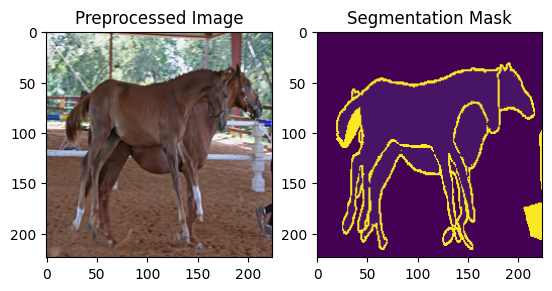

In [18]:
pairs = get_image_mask_pairs(image_dir, mask_dir)
print(f"Total image-mask pairs: {len(pairs)}")

# Preprocess and display a sample
sample_img_path, sample_mask_path = pairs[0]
image = preprocess_image(sample_img_path)
mask = preprocess_mask(sample_mask_path)

print("Image shape:", image.shape)
print("Mask shape:", mask.shape)

import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Preprocessed Image")

plt.subplot(1,2,2)
plt.imshow(mask)
plt.title("Segmentation Mask")
plt.show()


**Batch Preprocessing and Saving**

In [19]:
X_images = []
Y_masks = []

for img_path, mask_path in pairs:
    img = preprocess_image(img_path)
    mask = preprocess_mask(mask_path)

    X_images.append(img)
    Y_masks.append(mask)

# Convert to numpy arrays
X_images = np.array(X_images)
Y_masks = np.array(Y_masks)

# Save to disk
np.save("preprocessed_images.npy", X_images)
np.save("preprocessed_masks.npy", Y_masks)

print("✅ All images and masks preprocessed and saved.")


✅ All images and masks preprocessed and saved.


**Augmentation**

In [20]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])


**Split into Train & Test**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_images, Y_masks, test_size=0.2, random_state=42
)


In [22]:
# Save train-test split arrays
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("Y_train.npy", Y_train)
np.save("Y_test.npy", Y_test)

print("✅ Train and test splits saved as .npy files.")


✅ Train and test splits saved as .npy files.


In [23]:
import zipfile

# Create a ZIP archive of all 4 arrays
with zipfile.ZipFile("segmentation_split_data.zip", "w") as zipf:
    zipf.write("X_train.npy")
    zipf.write("X_test.npy")
    zipf.write("Y_train.npy")
    zipf.write("Y_test.npy")

print("📦 Zipped all split .npy files.")


📦 Zipped all split .npy files.


In [24]:
from google.colab import files
files.download("segmentation_split_data.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>